In [2]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")
include("src/bruteforce_utils.jl")

coarseness_bf (generic function with 1 method)

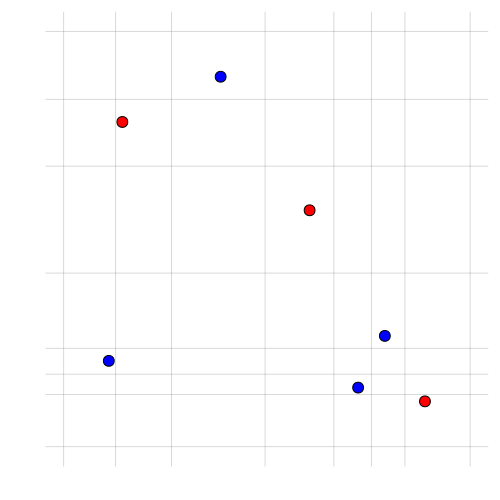

In [57]:
rng = MersenneTwister(1000)
n = 7
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)

7×4 Matrix{Any}:
 1  0.61  0.58  'r'
 2  0.92  0.05  'r'
 3  0.36  0.96  'b'
 4  0.81  0.23  'b'
 5  0.06  0.16  'b'
 6  0.74  0.09  'b'
 7  0.1   0.83  'r'


p = 3, q = 2, i = 4, j = 5
--------------------------
                      1  2  3  4  5  6  7  8    midpoint index
sortperm_x          = [5, 7, 3, 1, 6, 4, 2]
sortperm_x[p:p+i-1] = [3, 1, 6, 4]

                      1  2  3  4  5  6  7  8    midpoint index
sortperm_y          = [2, 6, 5, 4, 1, 7, 3]
sortperm_y[q:q+j-1] = [6, 5, 4, 1, 7]

intersection = [1, 6, 4]

     1  2   3   4   5   6  7    point index
w = [1, 1, -1, -1, -1, -1, 1]

Disc_pqij  = abs(sum(w[intersection])) = 1
Count_pqij = length(intersection)      = 3


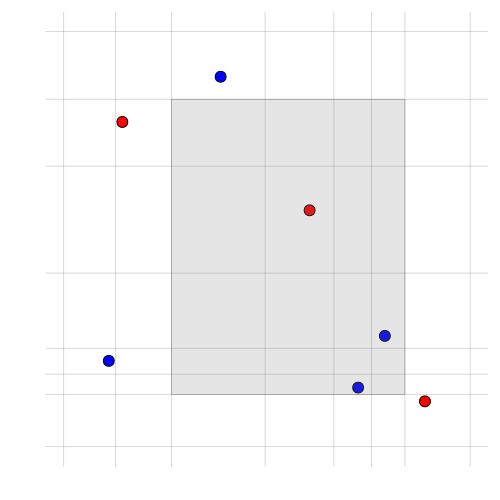

In [4]:
p = 3
q = 2
i = 4
j = 5

fig = print_S_info(S,p,q,i,j)
savefig(fig,"figs/box$p$q$i$j.svg")
fig

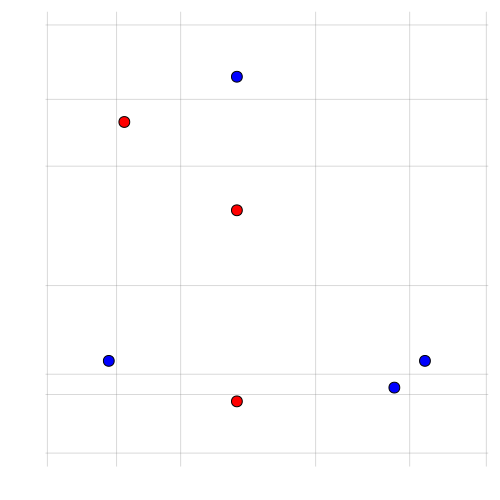

In [10]:
# Ejemplo con lineas perdidas
rng = MersenneTwister(1000)
n = 7
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])


S[1,1] = S[3,1]
S[2,1] = S[3,1]

S[4,2] = S[5,2]

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)

C[1,1,n,n]=3


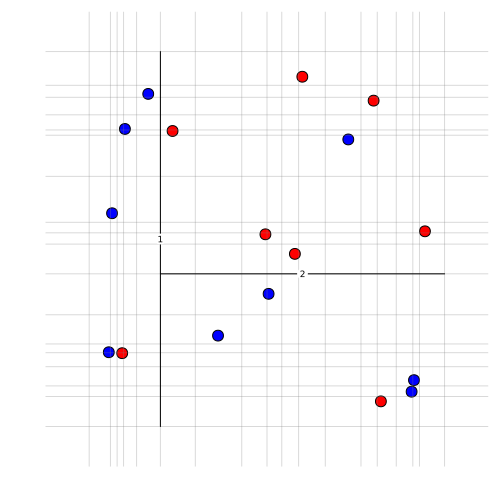

In [41]:
rng = MersenneTwister(1000)
n = 17
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])



C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
println("C[1,1,n,n]=$(C[1,1,n,n])")
fig

In [3]:
rng = MersenneTwister(1000)
n = 9
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])

c, Π_opt = coarseness_bf(S,w)

println("coarseness = ", c)
Π_opt

coarseness = 2


9×3 Matrix{Integer}:
 1  1  1
 1  2  2
 2  2  2
 1  2  2
 2  2  3
 1  1  1
 2  2  1
 2  2  2
 2  2  3

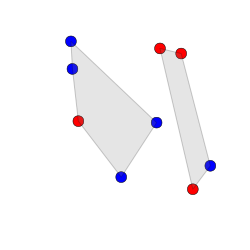

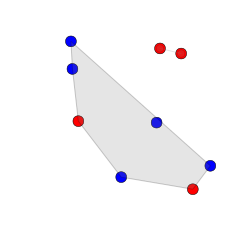

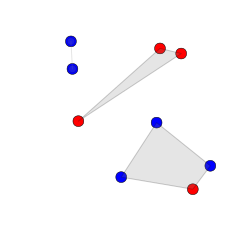

In [5]:
for i = 1:size(Π_opt,2)
    fig = plot_rb_points(S,w,Π_opt[:,i],fig_size=(250,250))
    savefig(fig,"figs/C_bf_$i.svg")
    display(fig)
end


i=33
C[1,1,n,n]=3


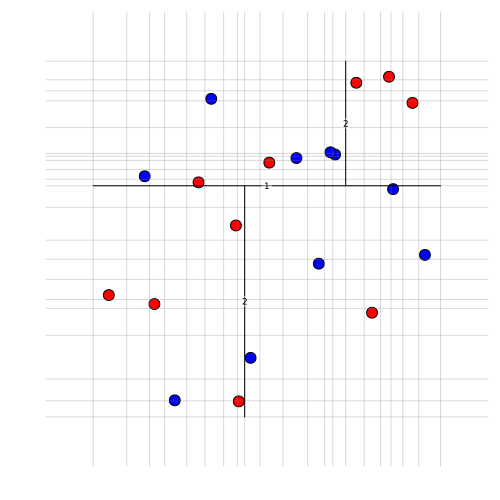

In [21]:
for i = 33 # 1:100
    rng = MersenneTwister(i)
    n = 20
    S = rand(rng,n,2)
    half = n ÷ 2
    w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])

    fig = plot_rb_points(S,w)
    plot_add_lines!(fig, S)

    C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)

    fig = plot_rb_points(S,w)
    plot_add_lines!(fig, S)
    plot_guillotine_line!(fig,1,1,n,n)
    println("\ni=$i")
    println("C[1,1,n,n]=$(C[1,1,n,n])")
    display(fig)
    savefig(fig,"figs/C_g_n$(n)_seed$(i).svg") ## OJO NO GUARDAR TODO!!
end


In [4]:
I = 80 # Repeticiones
N = 7
results = zeros(I,N,4) # c_g, c_bf, Πs, k_bf
pad = 7
for j = 1:N
    n = 3 + j
    println("----- ", rpad("n=$n ",30,"-"))
    println(rpad("c_g,",pad," "),rpad("c_bf,",pad," "),rpad("Πs,",pad," "),rpad("k_bf",pad," "))
    for i = 1:I
        rng = MersenneTwister(i)
        S = rand(rng,n,2)
        half = n ÷ 2
        w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])
        c_bf, Π_opt = coarseness_bf(S,w)
        k_bf = minimum(maximum(Π_opt,dims=1))
        Πs = size(Π_opt, 2)
        C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)
        c_g = C[1,1,n,n]
        println(rpad("$c_g,",pad," "),rpad("$c_bf,",pad," "),rpad("$Πs,",pad," "),rpad("$k_bf",pad," "))
        results[i,j,:] = [c_g, c_bf, Πs, k_bf]
    end
end

----- n=4 --------------------------
c_g,   c_bf,  Πs,    k_bf   
1,     2,     1,     2      
2,     2,     1,     2      
1,     1,     7,     2      
2,     2,     1,     2      
2,     2,     1,     2      
1,     1,     7,     2      
1,     1,     7,     2      
1,     1,     7,     2      
1,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
1,     1,     7,     2      
1,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
1,     1,     7,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
2,     2,     1,     2      
1,     1,     7,     2      
1,     1,     7,     2      
1,     2,     1,     2      
1,     1,     7,     2      
1,     2,     1,     2      
1,     2,     1,     2      
2,     2,     1,     2      
1,    

In [22]:
# c_g, c_bf, Πs, k_bf
println(size(results))
sum(results,dims=1)./80

(80, 7, 4)


1×7×4 Array{Float64, 3}:
[:, :, 1] =
 1.5625  1.35  2.0375  1.7875  2.4875  2.075  2.8125

[:, :, 2] =
 1.775  1.5375  2.3875  2.1625  2.85  2.5625  3.2875

[:, :, 3] =
 2.35  9.4125  1.675  14.775  2.9125  5.1125  5.4375

[:, :, 4] =
 2.0  1.5375  2.0  1.975  2.0  2.0125  2.0

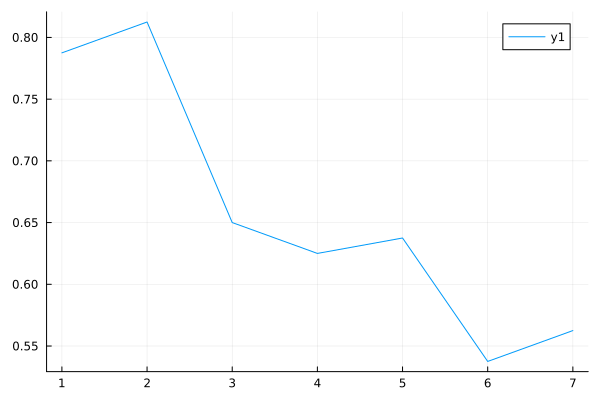

In [36]:
eq_prop = sum(results[:,:,2]-results[:,:,1].==0,dims=1)./80
plot(eq_prop[1,:])


In [32]:
means = sum(results[:,:,2]-results[:,:,1],dims=1)./80
print(means)
round.(sum((results[:,:,2]-results[:,:,1].-means).^2,dims=1)./80,digits=4)

[0.2125 0.1875 0.35 0.375 0.3625 0.4875 0.475]

1×7 Matrix{Float64}:
 0.1673  0.1523  0.2275  0.2344  0.2311  0.2998  0.3244

In [77]:
I = 80 # Repeticiones
N = 31
results2 = zeros(I,N,2) # c_g, rec_k
pad = 7
for j = 1:N
    n = 9 + j
    println("----- ", rpad("n=$n ",30,"-"))
    println(rpad("c_g,",pad," "),rpad("rec_k",pad," "))
    for i = 1:I
        rng = MersenneTwister(i)
        S = rand(rng,n,2)
        half = n ÷ 2
        w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])

        C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)
        c_g = C[1,1,n,n]
        fig = plot_rb_points(S,w)
        rec_k = [0]
        plot_guillotine_line!(fig,1,1,n,n)
        
        println(rpad("$c_g,",pad," "),rpad("$(rec_k[1])",pad," "))
        results2[i,j,:] = [c_g, rec_k[1]]
    end
end

----- n=10 -------------------------
c_g,   rec_k  
3,     1      
4,     1      
3,     1      
3,     1      
3,     1      
3,     1      
3,     1      
3,     1      
3,     1      
3,     1      
2,     1      
2,     1      
2,     1      
3,     1      
4,     1      
2,     1      
2,     2      
2,     1      
3,     1      
3,     1      
2,     1      
3,     1      
3,     1      
2,     1      
2,     1      
2,     1      
3,     1      
3,     1      
3,     1      
2,     1      
2,     1      
3,     1      
4,     1      
2,     1      
2,     1      
3,     1      
3,     1      
3,     1      
2,     1      
4,     1      
3,     1      
3,     1      
2,     1      
3,     1      
3,     1      
3,     1      
2,     1      
4,     1      
4,     1      
2,     1      
3,     1      
4,     1      
2,     1      
2,     1      
4,     1      
3,     1      
2,     2      
4,     1      
2,     1      
2,     1      
4,     1      
2,     1      
3,     1      
3, 

In [100]:
means2 = sum(results2,dims=1)./80
fig1 = plot(10:40,means2[:,:,1][:],label = :none, ylabel = "mean \$C_g(S)\$", xlabel = "\$n\$", size=(500,160))
fig2 = plot(10:40,means2[:,:,2][:],label = :none, ylabel = "mean \$K\$", xlabel = "\$n\$", size=(500,160))
savefig(fig1,"figs/exp2_f1.svg") 
savefig(fig2,"figs/exp2_f2.svg") 

"/home/jose/Desktop/USACH/2023_I/Coarseness/Coarseness-Examples/figs/exp2_f2.svg"

In [105]:
argmax(results2[:,:,2])
results2[60,12,2]

6.0


rec_k=[6]

i=73
C[1,1,n,n]=2


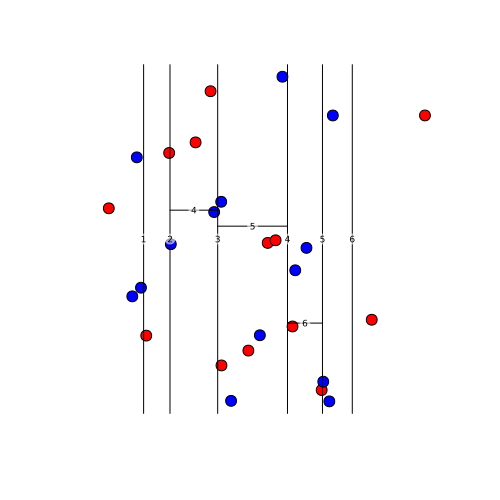

"/home/jose/Desktop/USACH/2023_I/Coarseness/Coarseness-Examples/figs/pato.svg"

In [116]:
include("src/plotting_utils.jl")

i = 73
n = se
    rng = MersenneTwister(i)
    S = rand(rng,n,2)
    half = n ÷ 2
    w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])

    fig = plot_rb_points(S,w)
    plot_add_lines!(fig, S)

    C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)

    fig = plot_rb_points(S,w)
    rec_k = [0] 
    plot_guillotine_line!(fig,1,1,n,n)
    println("\nrec_k=$rec_k")
    println("\ni=$i")
    println("C[1,1,n,n]=$(C[1,1,n,n])")
    display(fig)
savefig(fig,"figs/pato.svg") 